## Investigate blight detection by analysing a dataset consisting of images of potato leaves that show varying degrees of blight. Using TensorFlow and Keras, some models will be trained to classify images of potato leaves and detect blight.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential

from keras.utils import img_to_array
from keras.utils import load_img

import os


2025-03-27 11:00:36.571658: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Load the data from https://www.kaggle.com/datasets/rizwan123456789/potato-disease-leaf-datasetpld

Define batch size and the image's width and height

In [2]:
batch_size = 32
img_height = 256
img_width = 256

The images have already been split into directories corresponding to training/validation/testing.

In [3]:
training_ds = tf.keras.utils.image_dataset_from_directory(
    '/Users/robert/Documents/Data analysis/Potato_images/Training',
     image_size=(img_height, img_width),
     batch_size=batch_size)

Found 3251 files belonging to 3 classes.


In [4]:
class_names = training_ds.class_names
print(class_names)

['Early_Blight', 'Healthy', 'Late_Blight']


In [5]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
    '/Users/robert/Documents/Data analysis/Potato_images/Validation',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 416 files belonging to 3 classes.


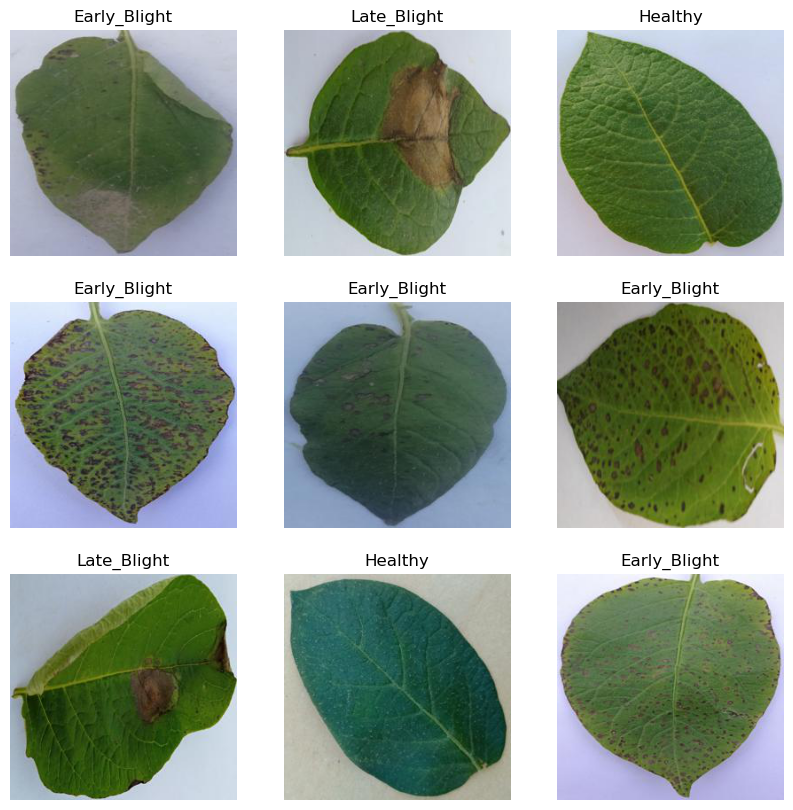

In [19]:
plt.figure(figsize=(10, 10))
for image, label in training_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

Construct a basic model consisting of a rescaling layer, three convolution layers and a fully connected layer.

In [20]:
model = Sequential([
    #Input
    layers.Input(shape=(img_height, img_width, 3)),
    #Normalise the rgb values for [0,255] to [0,1]
    layers.Rescaling(1./255),
    #Convolution layer - Begin with a (5,5) kernel since we are dealing with 256x256 images.
    layers.Conv2D(16, 5, padding='same', activation='relu'),
    #Reduce spatial dimension using maxpooling: selects the max value in each 2x2 block in the output of the convolution layer.
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    #Fully connected layer
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    #Add a softmax layer to generate a probability distribution
    layers.Dense(len(class_names), activation = 'softmax')])

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 256, 256, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,413,475 (32.09 MB)

 Trainable params: 8,413,475 (32.09 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model_hist = model.fit(
    training_ds,
    validation_data=validation_ds,
    epochs=10
)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.4190 - loss: 1.7170 - val_accuracy: 0.6154 - val_loss: 0.9018
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.6030 - loss: 0.9014 - val_accuracy: 0.6947 - val_loss: 0.7189
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.6932 - loss: 0.7270 - val_accuracy: 0.7668 - val_loss: 0.5707
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.8220 - loss: 0.4713 - val_accuracy: 0.8173 - val_loss: 0.4135
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.8870 - loss: 0.3011 - val_accuracy: 0.8534 - val_loss: 0.4075
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.8135 - loss: 0.4636 - val_accuracy: 0.8750 - val_loss: 0.3400
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.9293 - loss: 0.1936 - val_accuracy: 0.8870 - val_loss: 0.2865
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.9509 - loss: 0.1247 - val_accu

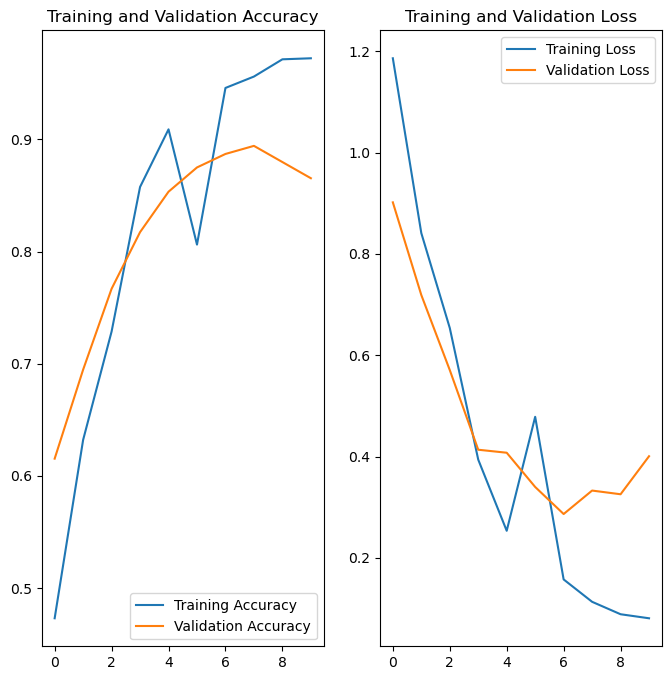

In [58]:
acc = model_hist.history['accuracy']
val_acc = model_hist.history['val_accuracy']

loss = model_hist.history['loss']
val_loss = model_hist.history['val_loss']

epoch_numbers = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch_numbers, acc, label='Training Accuracy')
plt.plot(epoch_numbers, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epoch_numbers, loss, label='Training Loss')
plt.plot(epoch_numbers, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The difference in the accuracy of the training data compared to the validation data indicates overfitting. After first making some predictions using this model, we will apply a dropout layer and compare the results.

#### Predictions

Make some predictions using the model.

In [41]:
from prediction_with_image import prediction_with_image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


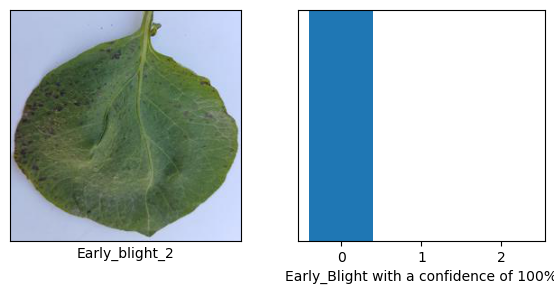

In [46]:
prediction_with_image('/Users/robert/Documents/Data analysis/Potato_images/Testing/Early_blight/Early_blight_2.jpg', 
                      img_height, img_width, class_names, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


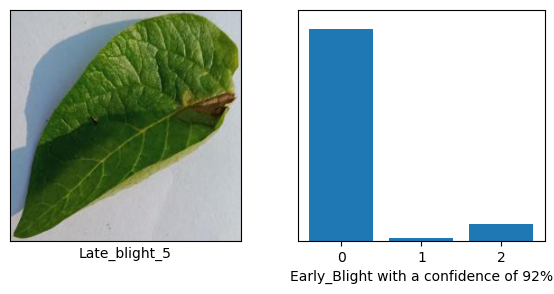

In [48]:
prediction_with_image('/Users/robert/Documents/Data analysis/Potato_images/Testing/Late_blight/Late_blight_5.jpg', 
                      img_height, img_width, class_names, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


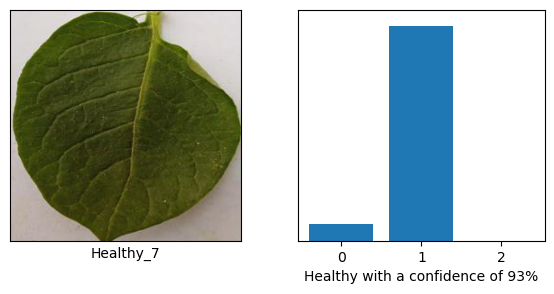

In [51]:
prediction_with_image('/Users/robert/Documents/Data analysis/Potato_images/Testing/Healthy/Healthy_7.jpg', 
                      img_height, img_width, class_names, model)

## Address the overfitting by introducing a dropout layer.

New model identical to the previous model with an additional layer introducing regularisation

In [52]:
model_dropout = Sequential([
    #Input
    layers.Input(shape=(img_height, img_width, 3)),
    #Normalise the rgb values for [0,255] to [0,1]
    layers.Rescaling(1./255),
    #Convolution layer - Begin with a (5,5) kernel since we are dealing with 256x256 images.
    layers.Conv2D(16, 5, padding='same', activation='relu'),
    #Reduce spatial dimension using maxpooling: selects the max value in each 2x2 block in the output of the convolution layer.
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    #Fully connected layer
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    #Add a softmax layer to generate a probability distribution
    layers.Dense(len(class_names), activation = 'softmax')])

model_dropout.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 256, 256, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,413,475 (32.09 MB)

 Trainable params: 8,413,475 (32.09 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model_dropout.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [54]:
model_dropout_hist = model_dropout.fit(
    training_ds,
    validation_data=validation_ds,
    epochs=10
)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.4088 - loss: 1.3506 - val_accuracy: 0.5697 - val_loss: 0.8851
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.5920 - loss: 0.8764 - val_accuracy: 0.7284 - val_loss: 0.7033
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.7075 - loss: 0.7060 - val_accuracy: 0.7596 - val_loss: 0.6448
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.7928 - loss: 0.5006 - val_accuracy: 0.8029 - val_loss: 0.5473
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.8548 - loss: 0.3995 - val_accuracy: 0.8774 - val_loss: 0.3820
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.8842 - loss: 0.3012 - val_accuracy: 0.8269 - val_loss: 0.4441
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.9168 - loss: 0.2326 - val_accuracy: 0.8726 - val_loss: 0.3359
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.9227 - loss: 0.2181 - val_accu

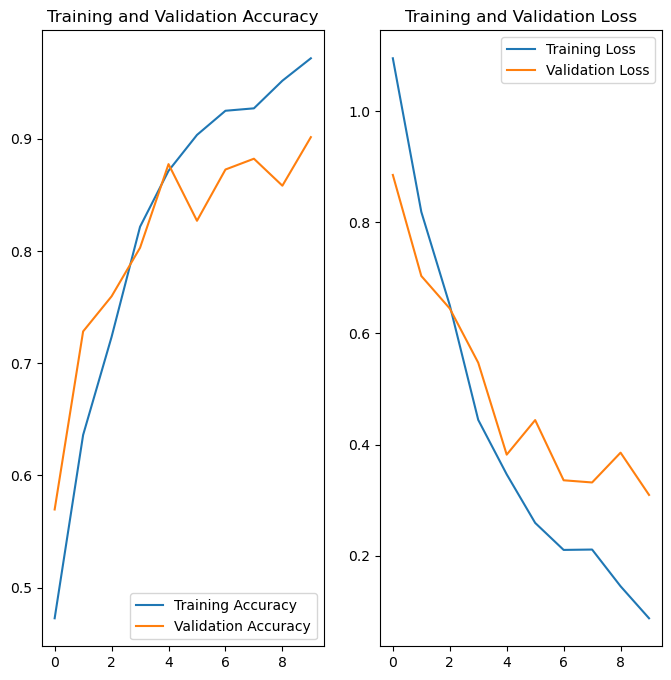

In [57]:
acc_do = model_dropout_hist.history['accuracy']
val_acc_do = model_dropout_hist.history['val_accuracy']

loss_do = model_dropout_hist.history['loss']
val_loss_do = model_dropout_hist.history['val_loss']

epoch_numbers = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch_numbers, acc_do, label='Training Accuracy')
plt.plot(epoch_numbers, val_acc_do, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epoch_numbers, loss_do, label='Training Loss')
plt.plot(epoch_numbers, val_loss_do, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


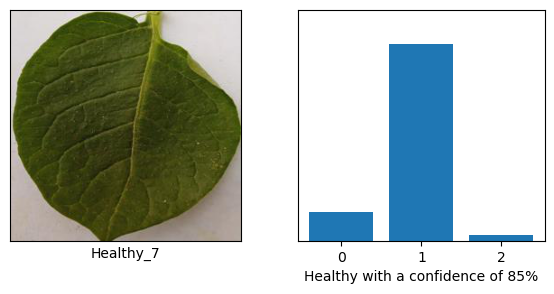

In [56]:
prediction_with_image('/Users/robert/Documents/Data analysis/Potato_images/Testing/Healthy/Healthy_7.jpg', 
                      img_height, img_width, class_names, model_dropout)

## Compare the models and their predictions

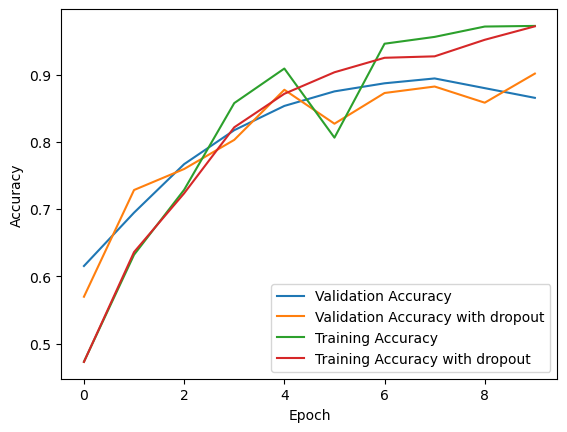

In [66]:

plt.plot(epoch_numbers, val_acc, label='Validation Accuracy')
plt.plot(epoch_numbers, val_acc_do, label='Validation Accuracy with dropout')
plt.plot(epoch_numbers, acc, label='Training Accuracy')
plt.plot(epoch_numbers, acc_do, label='Training Accuracy with dropout')
plt.legend(loc='lower right') 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

Adding a dropout layer yields a mild improvement in validation accuracy.

To add here: Quantify the difference in training and validation using Fréchet distance.

Compare predictions:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


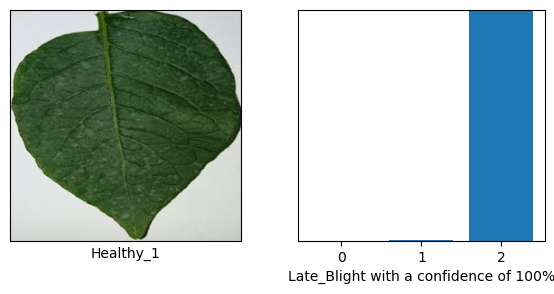

In [71]:
prediction_with_image('/Users/robert/Documents/Data analysis/Potato_images/Testing/Healthy/Healthy_1.jpg', 
                      img_height, img_width, class_names, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


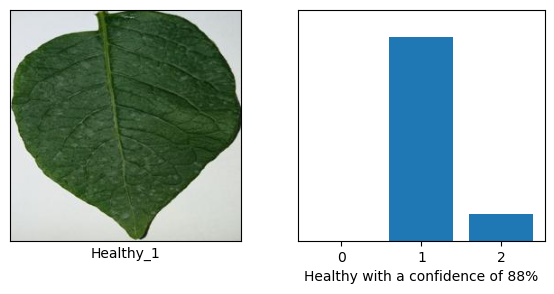

In [69]:
prediction_with_image('/Users/robert/Documents/Data analysis/Potato_images/Testing/Healthy/Healthy_1.jpg', 
                      img_height, img_width, class_names, model_dropout)

To add here: Investigate if adding the dropout layer improves accuracy across testing images.

Improve accuracy by investigating other compilers, data augmentation and adjusting the input parameters of the model. Compare with standard image classification models like VGG16 and Xception.